# FE Assignment

Kaggle의 Titanic - Machine Learning from Disaster에서 제공한 train.csv를 이용했습니다. https://www.kaggle.com/c/titanic/data

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [78]:
# Importing hprice.csv
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Imputing

In [79]:
x = titanic.isna().sum()/len(hprice)*100
print(x[x>0])

Age         12.123288
Cabin       47.054795
Embarked     0.136986
dtype: float64


Null값 비중이 47% 수준인 피처 1개는 없애고, 10% 이상인 1개는 따로 피처를 만듭니다.

In [80]:
titanic.drop(columns=['Cabin'], inplace=True)
columns = ['Age']
for c in columns:
    c_null = c+'_NULL'
    titanic[c_null] = 0
    for i in titanic.index:
        if titanic.loc[i,c]==np.nan:
            titanic.loc[i,c_null]=1

In [81]:
titanic[['Age']].dtypes

Age    float64
dtype: object

In [82]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# 2. Encoding

In [83]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Age_NULL         int64
dtype: object

type이 object인 것들을 인코딩함으로써 Categorical을 없애줍니다.

In [84]:
columns = ['Name', 'Sex', 'Ticket', 'Embarked']
for c in columns:
    print(c, titanic[c].nunique())

Name 891
Sex 2
Ticket 681
Embarked 3


In [85]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Age_NULL     891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [86]:
# Name과 Ticket으로 얻을 수 있는 정보가 없기에 없애줍니다.

titanic.drop('Name', axis=1, inplace=True)
titanic.drop('Ticket', axis=1, inplace=True)

In [87]:
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q' nan]


In [88]:
titanic = pd.get_dummies(titanic, columns=['Sex'])
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Age_NULL', 'Sex_female', 'Sex_male'],
      dtype='object')

In [89]:
titanic.groupby(['Embarked'])['Embarked'].count().sort_values(ascending=False)/len(titanic)*100

Embarked
S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

In [90]:
# 가장 많이 탑승한 S로 null 값을 채워줍니다.
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [91]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Age_NULL       0
Sex_female     0
Sex_male       0
dtype: int64

In [92]:
sit_type = ['S','C','Q']
for t in sit_type:
    titanic['SIT_TYPE'+'_'+t] = np.where(titanic['Embarked']==t,1,0)
titanic['Embarked'] = titanic['SIT_TYPE_S']
titanic.drop('SIT_TYPE_S', axis=1, inplace=True)
print(titanic['Embarked'])

0      1
1      0
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    0
890    0
Name: Embarked, Length: 891, dtype: int32


In [93]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [94]:
titanic['Age'] = titanic['Age'].apply(category_age)

In [95]:
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Age_NULL,Sex_female,Sex_male,SIT_TYPE_C,SIT_TYPE_Q
0,1,0,3,2,1,0,7.2500,1,0,0,1,0,0
1,2,1,1,3,1,0,71.2833,0,0,1,0,1,0
2,3,1,3,2,0,0,7.9250,1,0,1,0,0,0
3,4,1,1,3,1,0,53.1000,1,0,1,0,0,0
4,5,0,3,3,0,0,8.0500,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2,0,0,13.0000,1,0,0,1,0,0
887,888,1,1,1,0,0,30.0000,1,0,1,0,0,0
888,889,0,3,2,1,2,23.4500,1,0,1,0,0,0
889,890,1,1,2,0,0,30.0000,0,0,0,1,1,0


# 3. Outlier removing

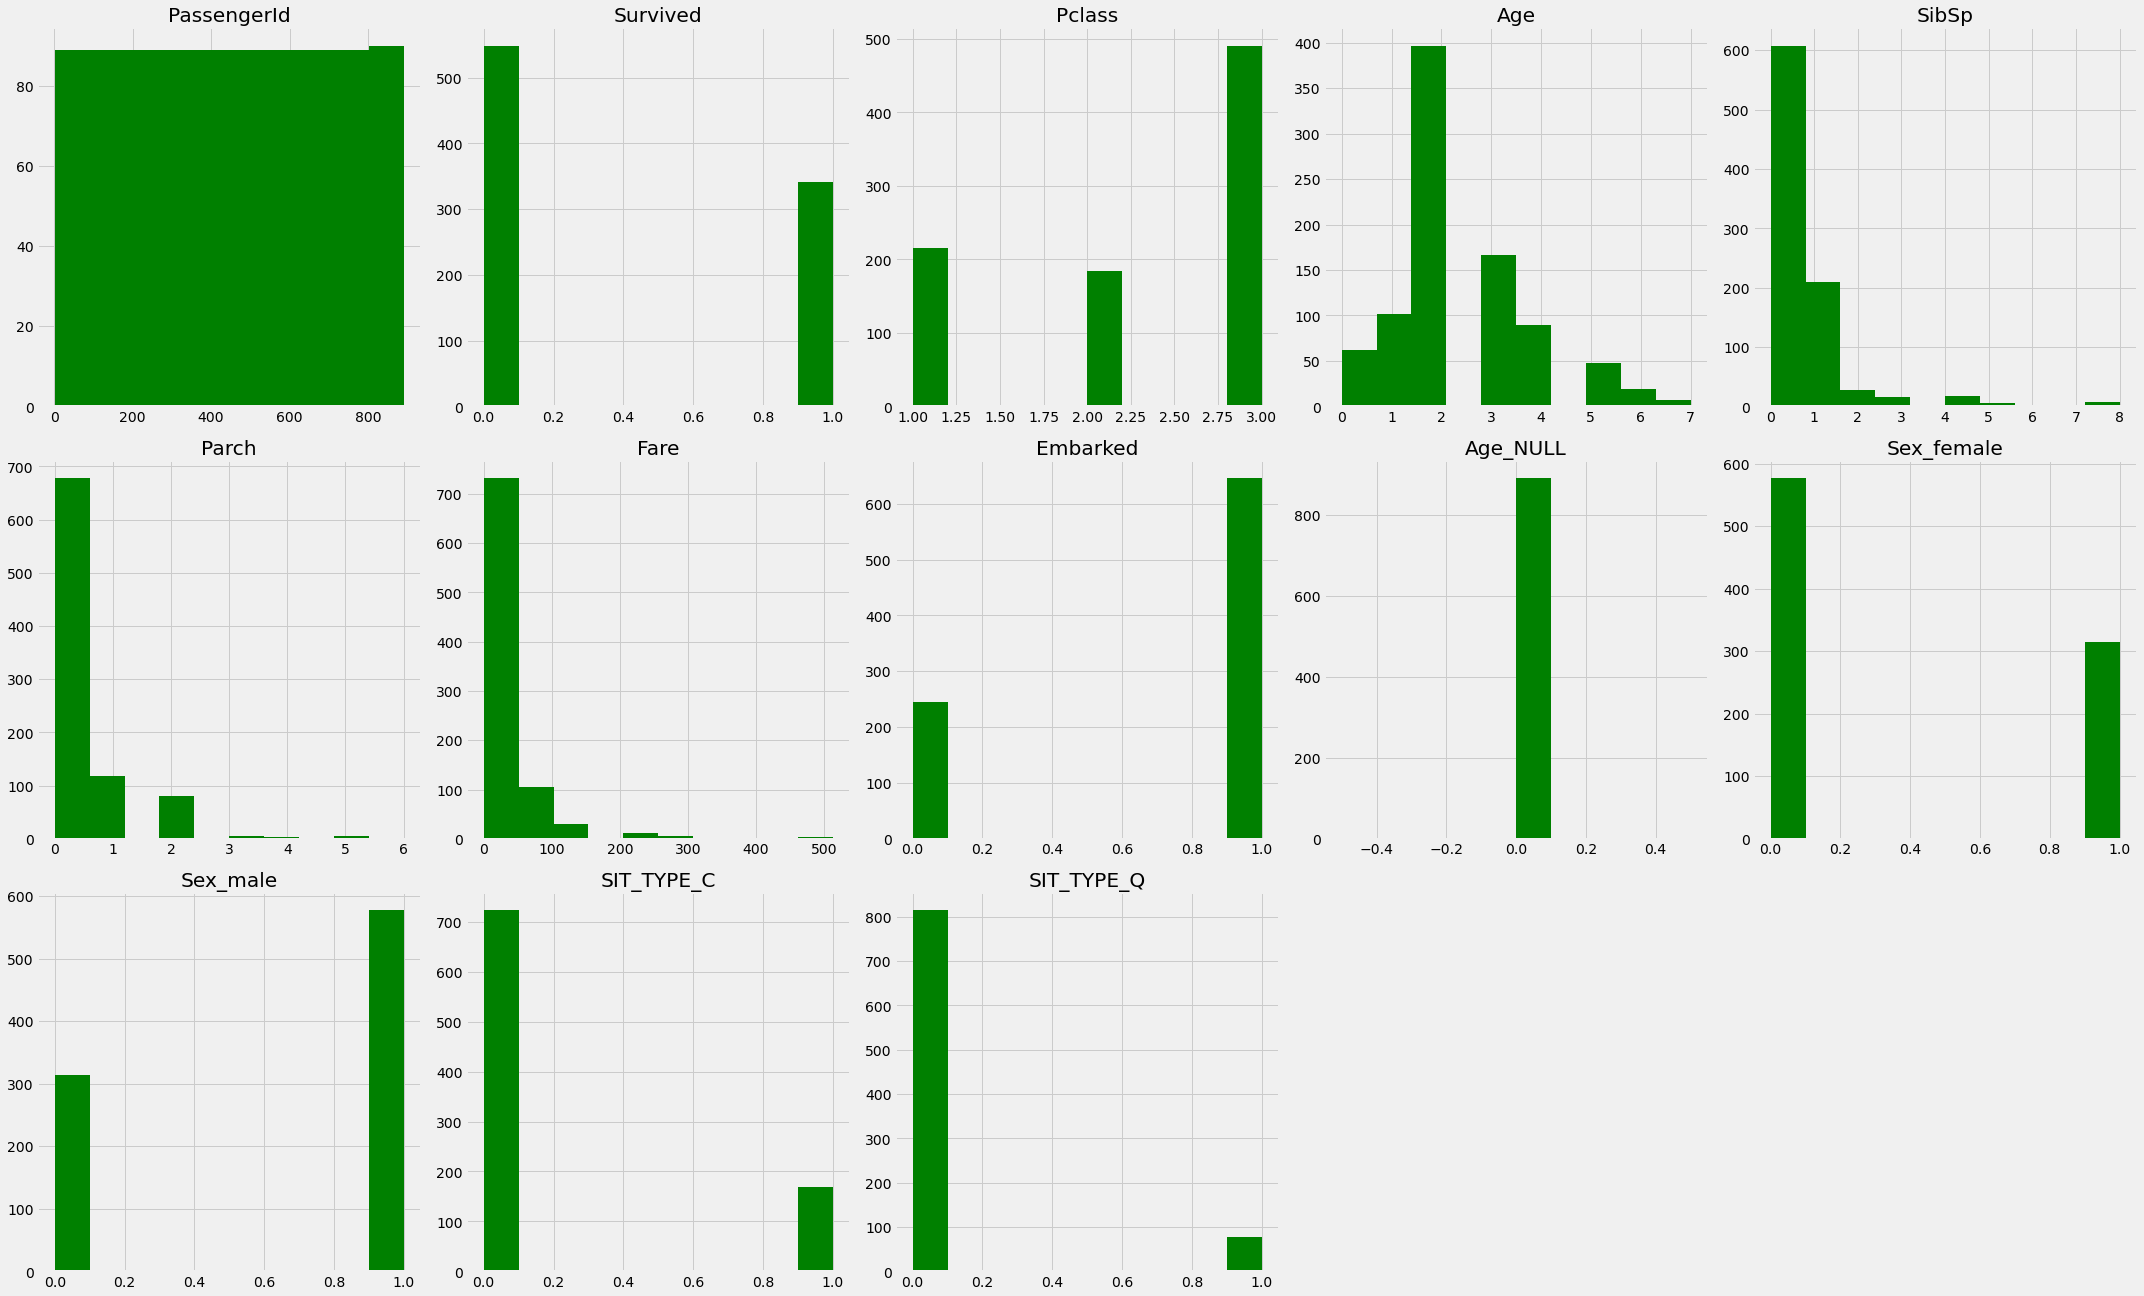

In [96]:
plt.figure(figsize=(30, 30))
for i, col in enumerate(titanic.columns.to_list()):
    plt.subplot(5, 5, i+1)
    plt.hist(titanic[col], label=col, color='green')
    plt.title(col)
    plt.tight_layout()

<AxesSubplot:ylabel='Age'>

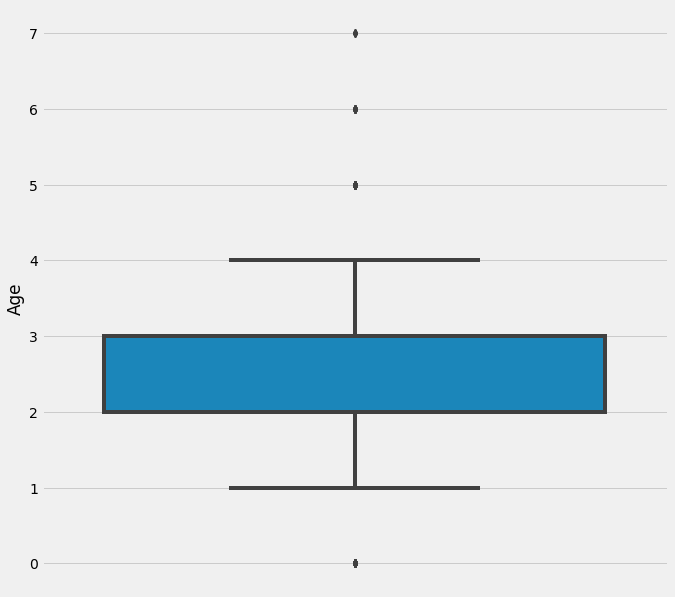

In [97]:
plt.figure(figsize=(10,10))
sns.boxplot(data=titanic, y='Age')

In [98]:
Q1 = titanic['Age'].quantile(0.25)
Q3 = titanic['Age'].quantile(0.75)
IQR = Q3 - Q1
width = 1.5
lower = Q1 - (width*IQR)
upper = Q3 + (width*IQR)
titanic['Age']=np.where(titanic['Age']>upper,upper,np.where(titanic['Age']<lower,lower,titanic['Age']))

<AxesSubplot:ylabel='Age'>

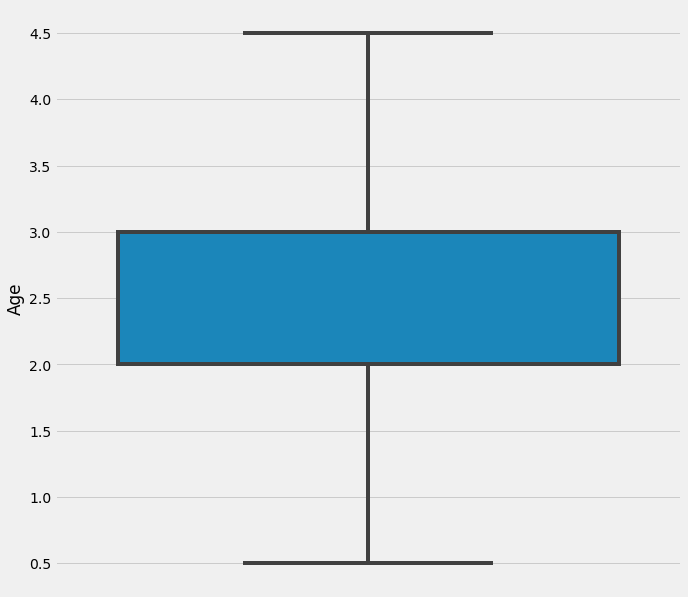

In [99]:
plt.figure(figsize=(10,10))
sns.boxplot(data=titanic, y='Age')

# 4. Correlation removing

<AxesSubplot:>

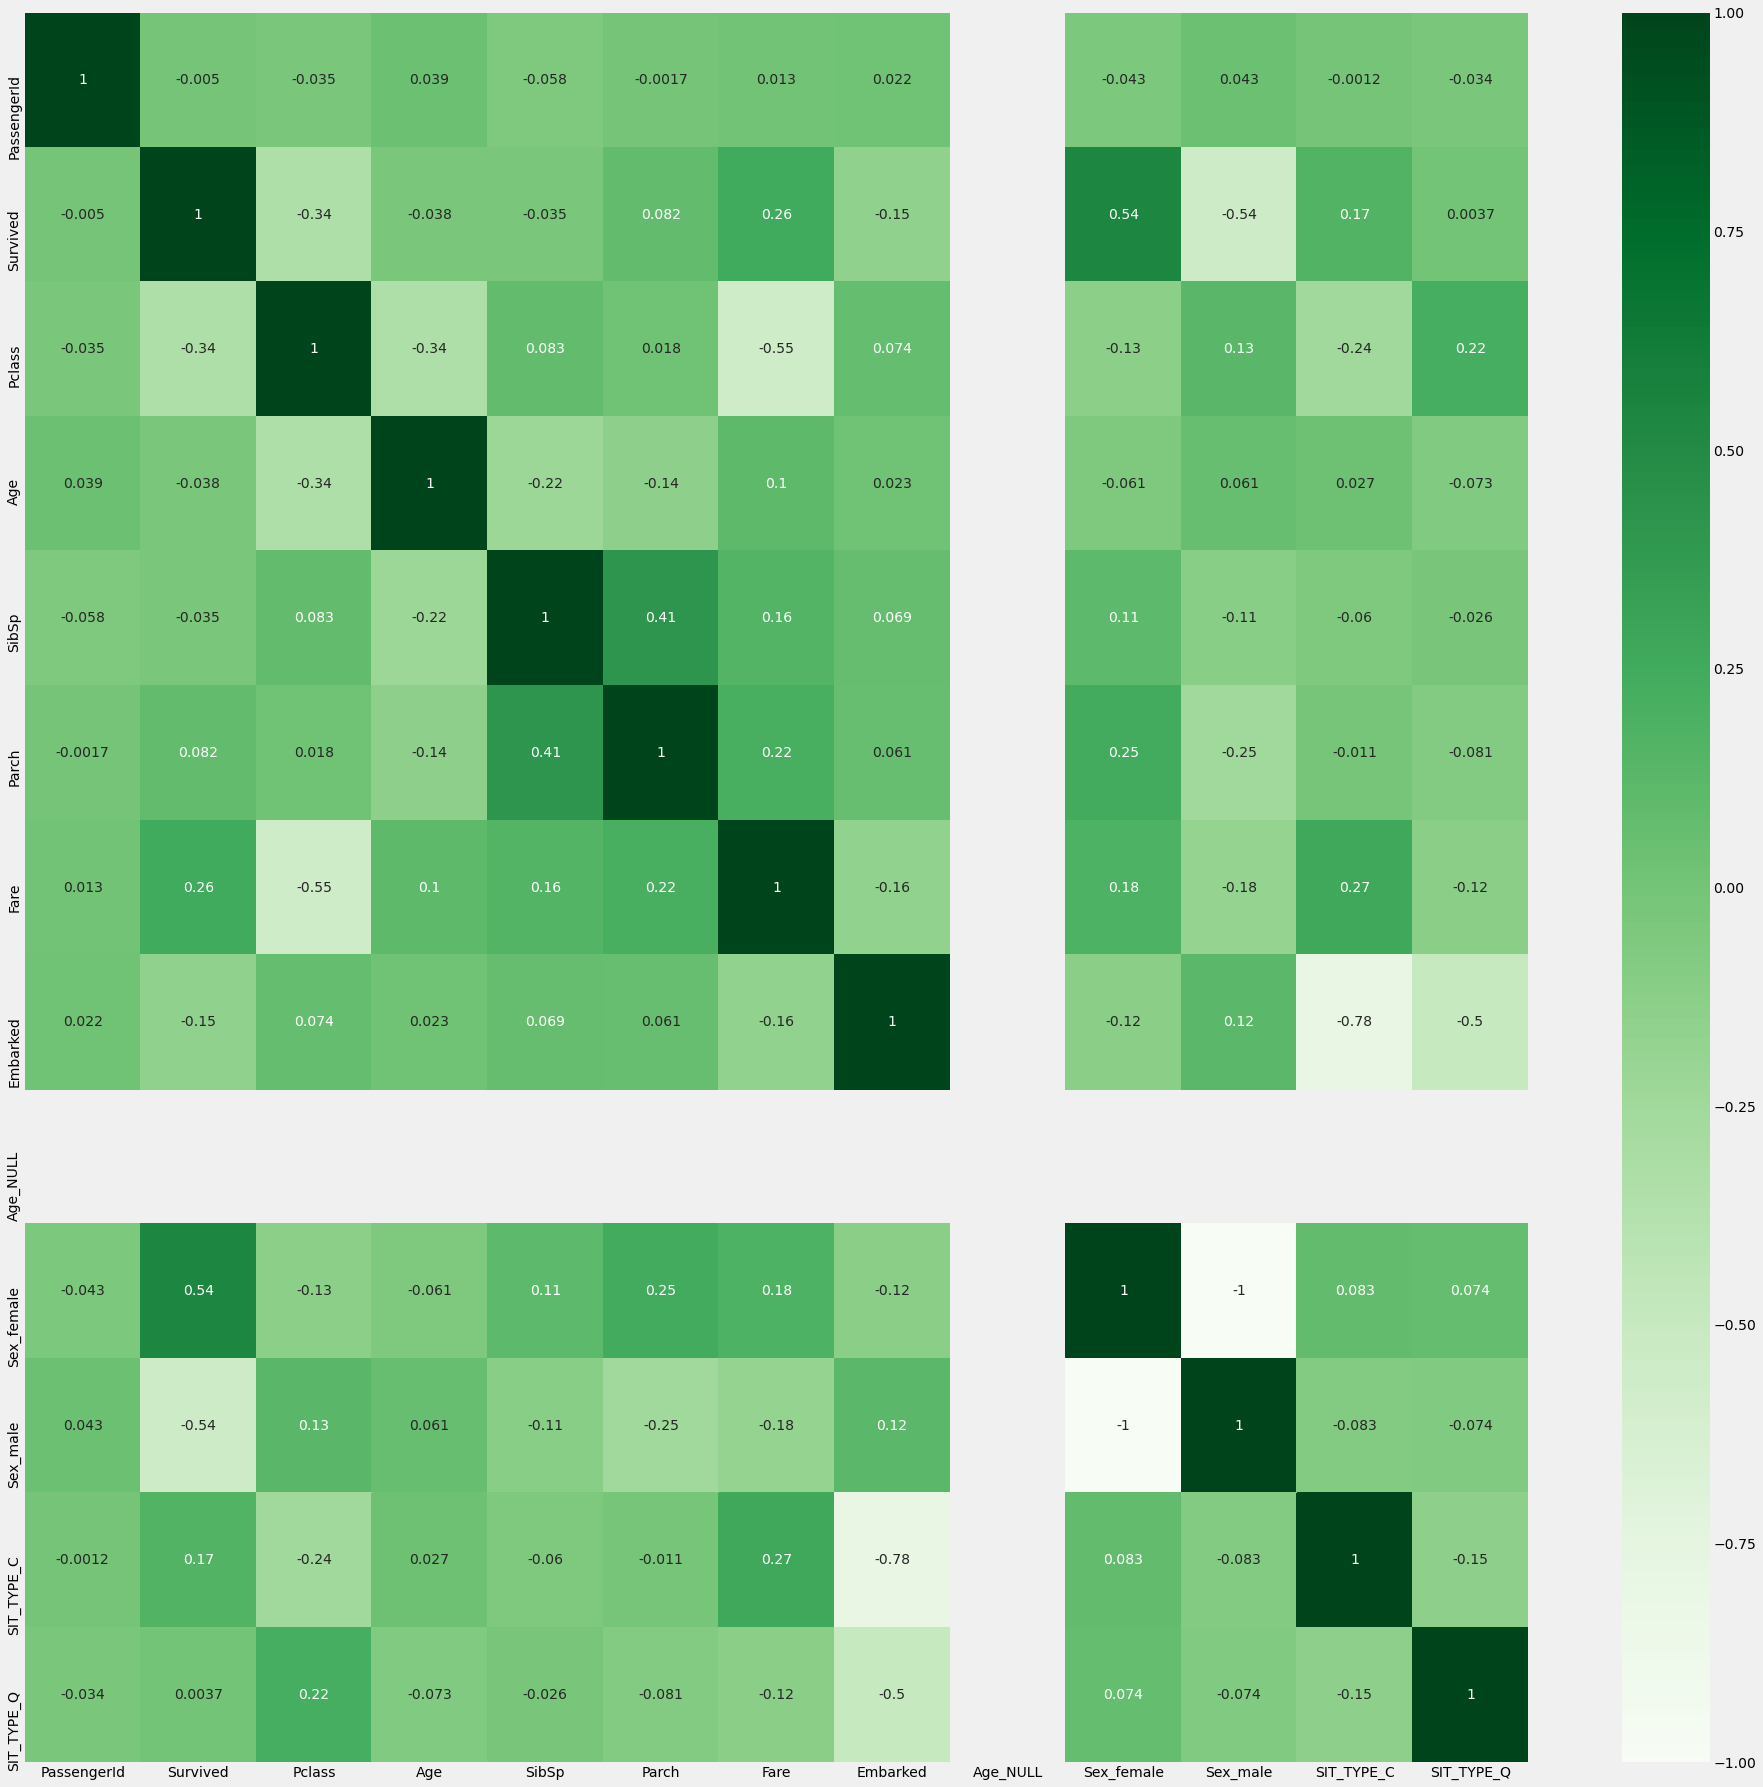

In [100]:
plt.figure(figsize=(30, 30))
sns.heatmap(titanic.corr(), annot=True, cmap='Greens')

In [101]:
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Age_NULL,Sex_female,Sex_male,SIT_TYPE_C,SIT_TYPE_Q
0,1,0,3,2.0,1,0,7.2500,1,0,0,1,0,0
1,2,1,1,3.0,1,0,71.2833,0,0,1,0,1,0
2,3,1,3,2.0,0,0,7.9250,1,0,1,0,0,0
3,4,1,1,3.0,1,0,53.1000,1,0,1,0,0,0
4,5,0,3,3.0,0,0,8.0500,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2.0,0,0,13.0000,1,0,0,1,0,0
887,888,1,1,1.0,0,0,30.0000,1,0,1,0,0,0
888,889,0,3,2.0,1,2,23.4500,1,0,1,0,0,0
889,890,1,1,2.0,0,0,30.0000,0,0,0,1,1,0
